In [16]:
#import pandas
import pandas as pd
#read in data from "births.csv" and "score.csv" as dataframes
birthsdf=pd.read_csv("files/births.csv", sep=",")
scoredf=pd.read_csv("files/score.csv", sep=",")

In [45]:
#examine the births dataset
birthsdf.head(10)
print(birthsdf.dtypes)
birthsdf.describe()

id            int64
bweight       int64
lowbw      category
gestwks     float64
preterm    category
matage        int64
hyp        category
sex        category
dtype: object


,id,bweight,gestwks,matage
count,500.000000,500.000000,490.000000,500.000000
mean,250.500000,3136.884000,38.721857,34.028000
std,144.481833,637.451485,2.314167,3.897897
min,1.000000,628.000000,24.690001,23.000000
25%,125.750000,2862.000000,37.939999,31.000000
50%,250.500000,3188.500000,39.125000,34.000000
75%,375.250000,3551.250000,40.090000,37.000000
max,500.000000,4553.000000,43.160000,43.000000


In [22]:
#Transform categorical variables in the right format
birthsdf["lowbw"]=birthsdf["lowbw"].astype("category")
birthsdf["preterm"]=birthsdf["preterm"].astype("category")
birthsdf["hyp"]=birthsdf["hyp"].astype("category")
birthsdf["sex"]=birthsdf["sex"].astype("category")

birthsdf.head(10)



,id,bweight,lowbw,gestwks,preterm,matage,hyp,sex
0,1,2974,0,38.520000,0.0,34,0,2
1,2,3270,0,NaN,NaN,30,0,1
2,3,2620,0,38.150002,0.0,35,0,2
3,4,3751,0,39.799999,0.0,31,0,1
4,5,3200,0,38.889999,0.0,33,1,1
5,6,3673,0,40.970001,0.0,33,0,2
6,7,3628,0,42.139999,0.0,29,0,2
7,8,3773,0,40.209999,0.0,37,0,1
8,9,3960,0,42.029999,0.0,36,0,2
9,10,3405,0,39.330002,0.0,39,0,1


In [25]:
#new dataframe with any rows with missing data excluded
birthsdf_clean=birthsdf.dropna()
scoredf_clean=scoredf.dropna()



In [32]:
#merge two dataframes, keeping matching and unmatching rows
merged_df=pd.merge(birthsdf_clean, scoredf_clean, on="id", how="outer")
#this creates a new datafarme merging by id number. 



id   bweight  lowbw  gestwks    preterm  matage  hyp  sex  score     
1    2974     0      38.520000  0.0      34      0    2    182.279785    1
340  3184     0      40.730000  0.0      34      0    2    181.702150    1
338  2736     0      36.240002  1.0      24      1    2    146.528485    1
337  1325     1      34.669998  1.0      36      0    2    168.679881    1
336  2605     0      39.220001  0.0      29      0    1    190.475311    1
                                                                        ..
167  2751     0      34.700001  1.0      34      0    1    143.074179    1
166  3117     0      40.549999  0.0      40      0    1    191.218456    1
164  3261     0      37.630001  0.0      25      1    1    124.170074    1
163  3027     0      40.230000  0.0      35      0    2    187.537476    1
500  2918     0      37.970001  0.0      31      0    1    164.519514    1
Name: count, Length: 425, dtype: int64

In [40]:

columns_to_check=["bweight","lowbw","gestwks","preterm","matage","hyp","sex","score"]
missing_count = merged_df[columns_to_check].isna().sum()
print(missing_count)

#There are rows without scores (65), but there are no rows that have score values but do not have the other info. I.e. all the ids in the score dataset are in the births dataset.


bweight     0
lowbw       0
gestwks     0
preterm     0
matage      0
hyp         0
sex         0
score      65
dtype: int64


In [44]:
#Reorder the merged dataset by variable score
sorted_merged_df=merged_df.sort_values(by="score", ascending=True)



,id,bweight,lowbw,gestwks,preterm,matage,hyp,sex,score
176,181,1019,1,28.040001,1.0,31,1,1,107.331871
307,313,1595,1,30.520000,1.0,33,1,1,109.245431
118,123,1663,1,35.139999,1.0,37,1,1,114.176776
412,423,2697,0,37.540001,0.0,43,1,2,117.284243
248,253,693,1,30.709999,1.0,34,1,1,120.938331


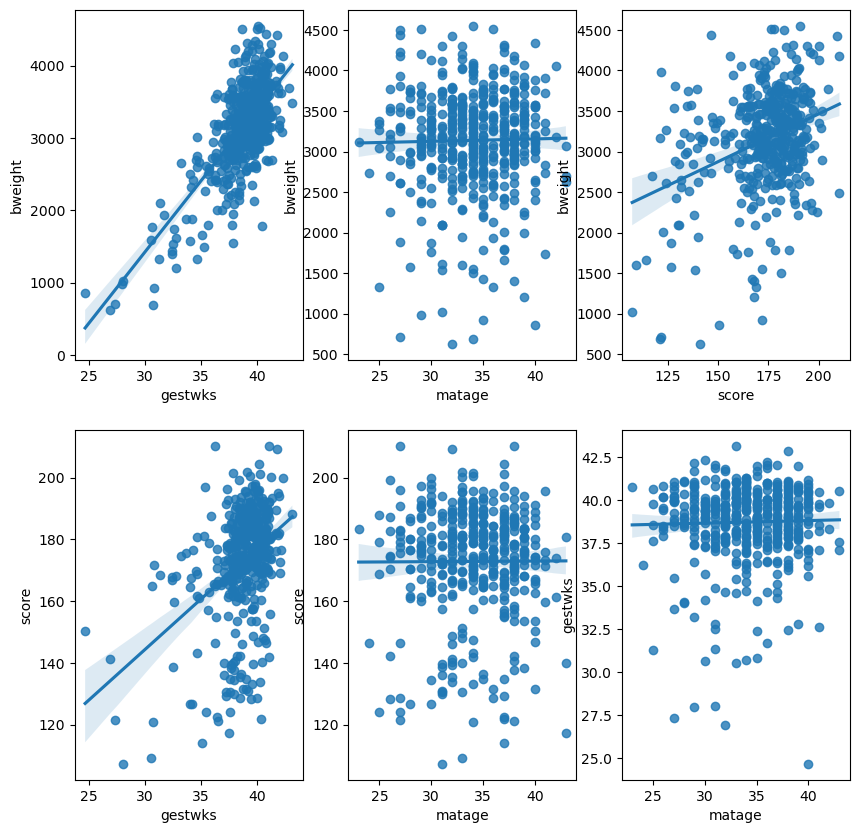

In [66]:
#using seaborn and regression plots to examine relationship between continuous variables

import seaborn as sns
fig, axs=plt.subplots(2, 3, figsize=(10,10))
sns.regplot(x=merged_df["gestwks"], y=merged_df["bweight"], ax=axs[0,0])
sns.regplot(x=merged_df["matage"], y=merged_df["bweight"], ax=axs[0,1])
sns.regplot(x=merged_df["score"], y=merged_df["bweight"], ax=axs[0,2])
sns.regplot(x=merged_df["gestwks"], y=merged_df["score"], ax=axs[1,0])
sns.regplot(x=merged_df["matage"], y=merged_df["score"], ax=axs[1,1])
sns.regplot(x=merged_df["matage"], y=merged_df["gestwks"], ax=axs[1,2])
plt.show()

In [84]:
import numpy as np
#Drops rows with missing values
cleaned_merged_df=merged_df.dropna()
correlation_coef_bweight_vs_gestwks=np.corrcoef(cleaned_merged_df["bweight"], cleaned_merged_df["gestwks"])[0,1]
correlation_coef_matage_vs_bweight=np.corrcoef(cleaned_merged_df["matage"], cleaned_merged_df["bweight"])[0,1]
correlation_coef_bweight_vs_score=np.corrcoef(cleaned_merged_df["bweight"], cleaned_merged_df["score"])[0,1]
correlation_coef_score_vs_gestwks=np.corrcoef(cleaned_merged_df["score"], cleaned_merged_df["gestwks"])[0,1]
correlation_coef_matage_vs_score=np.corrcoef(cleaned_merged_df["matage"], cleaned_merged_df["score"])[0,1]
correlation_coef_matage_vs_gestwks=np.corrcoef(cleaned_merged_df["matage"], cleaned_merged_df["gestwks"])[0,1]
print(f"The correlation coefficient between birthweight and gestational weeks is {round(correlation_coef_bweight_vs_gestwks,4)}.")
print(f"The correlation coefficient between maternal age and birthweight is {round(correlation_coef_matage_vs_bweight,4)}.")
print(f"The correlation coefficient between birthweight and score is {round(correlation_coef_bweight_vs_score,4)}.")
print(f"The correlation coefficient between gestational weeks and score is {round(correlation_coef_score_vs_gestwks,4)}.")
print(f"The correlation coefficient between maternal age and score is {round(correlation_coef_matage_vs_score,4)}.")
print(f"The correlation coefficient between maternal age and gestational weeks is {round(correlation_coef_matage_vs_gestwks,4)}.")



The correlation coefficient between birthweight and gestational weeks is 0.6995.
The correlation coefficient between maternal age and birthweight is -0.0097.
The correlation coefficient between birthweight and score is 0.3365.
The correlation coefficient between gestational weeks and score is 0.406.
The correlation coefficient between maternal age and score is 0.0041.
The correlation coefficient between maternal age and gestational weeks is 0.0155.


In [88]:
#Examine the two way distribution of the categorical variables in tabular form.

sex_hyp_group=pd.crosstab(cleaned_merged_df["sex"], cleaned_merged_df["hyp"])
print('Sex and Hypertension distribution:\n', sex_hyp_group, '\n')
sex_preterm_group=pd.crosstab(cleaned_merged_df["sex"], cleaned_merged_df["preterm"])
print('Sex and Preterm distribution:\n', sex_preterm_group, '\n')
preterm_hyp_group=pd.crosstab(cleaned_merged_df["preterm"], cleaned_merged_df["hyp"])
print('Preterm and Hypertension distribution:\n', preterm_hyp_group, '\n')
lowbw_sex_group=pd.crosstab(cleaned_merged_df["sex"], cleaned_merged_df["lowbw"])
print('Low birthweight and Sex distribution:\n', lowbw_sex_group, '\n')
lowbw_hyp_group=pd.crosstab(cleaned_merged_df["lowbw"], cleaned_merged_df["hyp"])
print('Lowbirthweight and Hypertension distribution:\n', lowbw_hyp_group, '\n')
lowbw_preterm_group=pd.crosstab(cleaned_merged_df["lowbw"], cleaned_merged_df["preterm"])
print('Low birghweight and Preterm distribution:\n', lowbw_preterm_group, '\n')

Sex and Hypertension distribution:
 hyp    0   1
sex         
1    191  36
2    178  20 

Sex and Preterm distribution:
 preterm  0.0  1.0
sex              
1        202   25
2        174   24 

Preterm and Hypertension distribution:
 hyp        0   1
preterm         
0.0      332  44
1.0       37  12 

Low birthweight and Sex distribution:
 lowbw    0   1
sex           
1      204  23
2      171  27 

Lowbirthweight and Hypertension distribution:
 hyp      0   1
lowbw         
0      333  42
1       36  14 

Low birghweight and Preterm distribution:
 preterm  0.0  1.0
lowbw            
0        356   19
1         20   30 



In [91]:
#create a new variable highscore that identifies a score higher than 150
cleaned_merged_df["highscore"]=np.where(cleaned_merged_df["score"]>150, "1","0")

/var/folders/64/x7_jk0ds5174rzhfbs9sv8b80000gn/T/ipykernel_80866/401580403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_merged_df["highscore"]=np.where(cleaned_merged_df["score"]>150, "1","0")
